<a href="https://colab.research.google.com/github/mgoncalves-chaves/ETL_python/blob/main/ETL_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ETL com Python

Contexto: Há uma planilha em formato CSV com dados de temperatura máxima e mínima prevista para a próxima semana na cidade de São Paulo. Os dados serão extraídos e transformados em um DataFrame para a criação de gráficos que mostram a variação dos últimos dias. Os gráficos gerados serão então enviados para uma pasta no Google Drive.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Extract

Extraindo os dados de temperatura a partir do arquivo CSV.

In [ ]:
dados_temperatura= pd.read_csv("temp_sp.csv", index_col=[0])
dados_temperatura

,Temperatura Max (°C),Temperatura Min (°C)
Data,,
20/09/2023,32,18
21/09/2023,32,19
22/09/2023,35,21
23/09/2023,36,23
24/09/2023,37,21
25/09/2023,28,19
26/09/2023,31,19


#Transform

Utilizando a biblioteca matplotlib para transformar os dados em um gráfico com os valores máximos e mínimos.

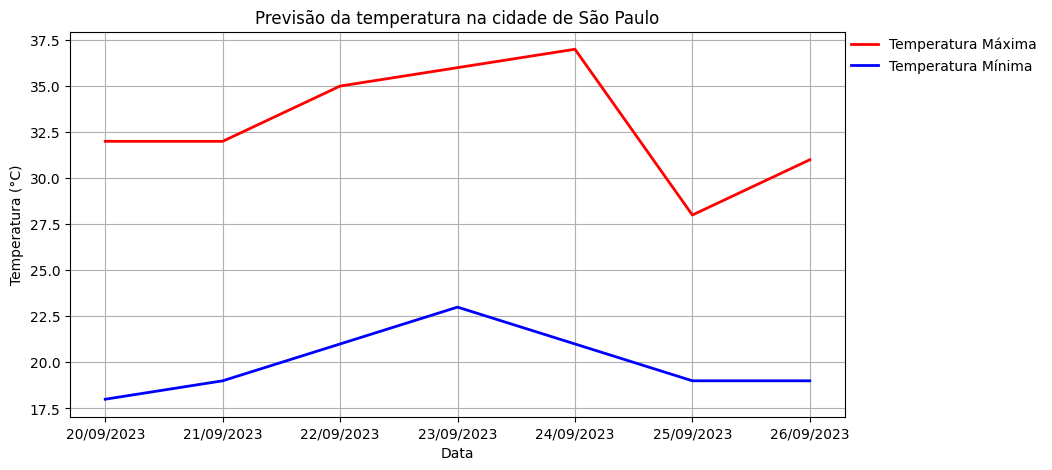

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(dados_temperatura['Temperatura Max (°C)'], color='red', linestyle='-', linewidth=2, label='Temperatura Máxima')
plt.plot(dados_temperatura['Temperatura Min (°C)'], color='blue', linestyle='-', linewidth=2, label='Temperatura Mínima')
plt.title('Previsão da temperatura na cidade de São Paulo')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', borderaxespad=0.,frameon=False, fontsize=10)
plt.grid()
plt.savefig('previsao_sp.png', dpi = 300, bbox_inches='tight')

#Load
Carregando o gráfico gerado para o repositório do GitHub via REST API utilizando a biblioteca request.

In [ ]:
import requests
from pathlib import Path

In [ ]:
DATA_PATH = Path("data/")

# Create the data folder
if DATA_PATH.is_dir():
  print(f"directory already exists...")
else:
  print(f"creating {DATA_PATH}...")
  DATA_PATH.mkdir(parents=True, exist_ok=True)

#Download data for Ahja
with open(DATA_PATH / "previsao_sp.png", "wb") as f:
  request = requests.post("https://github.com/mgoncalves-chaves/ETL_python/blob/04c478454bda1fa8b968848d4963b7d5f5b45b12/previsao_sp.png")
  f.write(request.content)

creating data...
